# Exercise 5: Clustering
--------------------
In this exercise, we will learn about unsupervised learning and clustering. The data set we will use contains customer data from a shopping mall. It is taken from Kaggle: [Link to Mall customer data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/).

The customer data set consists of 200 instances where each instance describes a specific customer of the mall. You can access information about
- the customer ID
- gender
- age
- annual income in k$
- and the spending score of the customers
The spending score is assigned to customers by the mall owner and is based on past purchase data and customer behavior. A high spending score means that the customer spends a lot of money in the mall.

The goal of this exercise is to analyze and understand customer behavior. To enable customer-specific marketing, the customers shall be grouped and a separate marketing strategy will be developed for each group. Your task will be to group the customers with the help of clustering algorithms.

------------------------------
## Task 1: Analyze Data

Load the mall customer data set into a *pandas* data frame. Analyze the given features and plot their statistical distributions. What conclusions can you draw from this analysis?

First Rows of the Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Statist

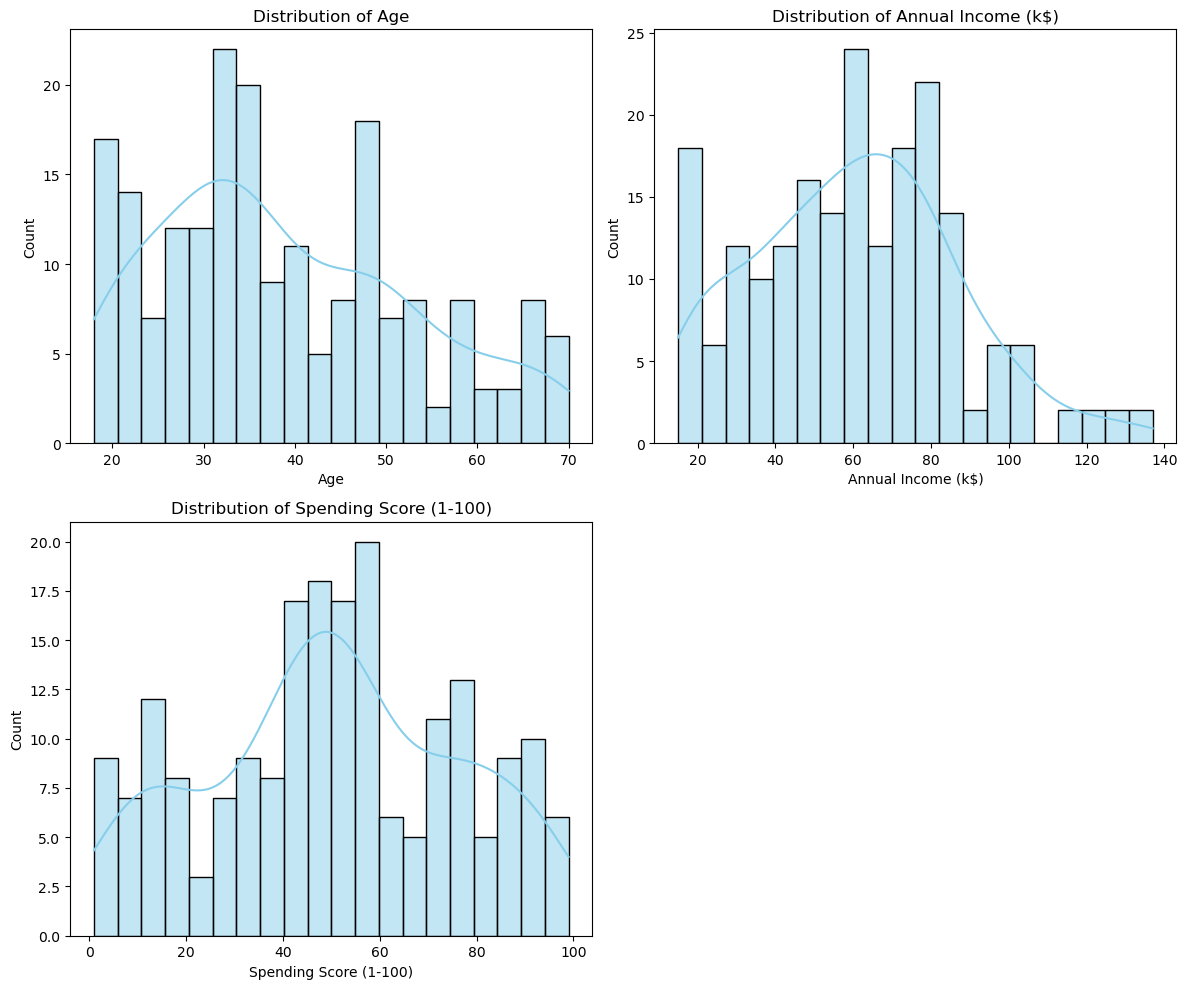

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\bbayr\Desktop\Dersler\Machine Learning Applications\Exercise\Exercise V Clustering\Mall_Customers.csv"
df = pd.read_csv(file_path)

# Inspect the first few rows of the data
print("First Rows of the Data:")
print(df.head())

# Check general information about the data
print("\nData Information:")
print(df.info())

# Statistical summary of the data
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distributions of features
plt.figure(figsize=(12, 10))
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


## Task 2: Hierarchical clustering - Dendrogram

Now we want to use the three features "Age", "Annual Income" and "Spending Score" to perform an agglomerative hierarchical clustering of the customers. Use the hierarchical clustering functions of *scipy* to plot a dendrogram of the clustering. Note: You can use the *linkage* and *dendrogram* functions from the mentioned library.

Based on the dendrogram, what seems to be a good number of clusters into which you can group the customers?

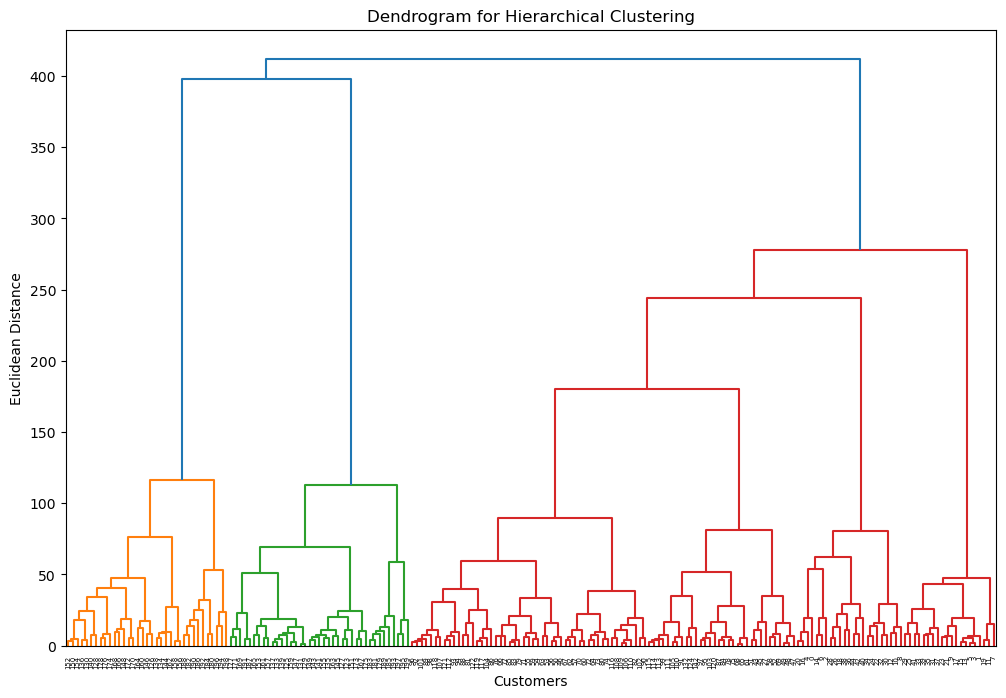

In [6]:
# Import necessary libraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Select the features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Perform hierarchical clustering using Ward's method
linked = linkage(features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending', 
           show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


In [7]:
"""
# Import necessary libraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Select the features for clustering
features = df[['Age', 'Spending Score (1-100)']].values

# Perform hierarchical clustering using Ward's method
linked = linkage(features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending', 
           show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()
"""

"\n# Import necessary libraries for hierarchical clustering\nfrom scipy.cluster.hierarchy import linkage, dendrogram\nimport matplotlib.pyplot as plt\n\n# Select the features for clustering\nfeatures = df[['Age', 'Spending Score (1-100)']].values\n\n# Perform hierarchical clustering using Ward's method\nlinked = linkage(features, method='ward')\n\n# Plot the dendrogram\nplt.figure(figsize=(12, 8))\ndendrogram(linked, \n           orientation='top', \n           distance_sort='descending', \n           show_leaf_counts=False)\nplt.title('Dendrogram for Hierarchical Clustering')\nplt.xlabel('Customers')\nplt.ylabel('Euclidean Distance')\nplt.show()\n"

In [8]:
"""
# Import necessary libraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Select the features for clustering
features = df[['Age']].values

# Perform hierarchical clustering using Ward's method
linked = linkage(features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending', 
           show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()
"""


"\n# Import necessary libraries for hierarchical clustering\nfrom scipy.cluster.hierarchy import linkage, dendrogram\nimport matplotlib.pyplot as plt\n\n# Select the features for clustering\nfeatures = df[['Age']].values\n\n# Perform hierarchical clustering using Ward's method\nlinked = linkage(features, method='ward')\n\n# Plot the dendrogram\nplt.figure(figsize=(12, 8))\ndendrogram(linked, \n           orientation='top', \n           distance_sort='descending', \n           show_leaf_counts=False)\nplt.title('Dendrogram for Hierarchical Clustering')\nplt.xlabel('Customers')\nplt.ylabel('Euclidean Distance')\nplt.show()\n"

## Task 3: Analysis of hierarchical clustering

Now, use the *fcluster* function from *scipy* to assign the customers to the clusters you defined using the dendrogram. Analyze the clusters: can you explain how the clusters differ from each other and what these differences might mean for possible marketing strategies?

Cluster Analysis:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
1         22.000000  25.333333           25.095238               80.047619   
2         20.166667  48.750000           24.583333                9.583333   
3         26.090909  41.363636           28.181818               33.272727   
4         63.055556  46.111111           46.388889               50.638889   
5        139.333333  37.166667           74.166667               34.833333   
6        101.511628  40.186047           61.139535               49.860465   
7        190.000000  33.000000          109.555556               85.888889   
8        151.571429  32.785714           78.285714               90.500000   
9        155.375000  32.437500           80.812500               72.687500   
10       156.652174  41.217391           80.956522               12.782609   
11       190.777778  40.444444          111.00

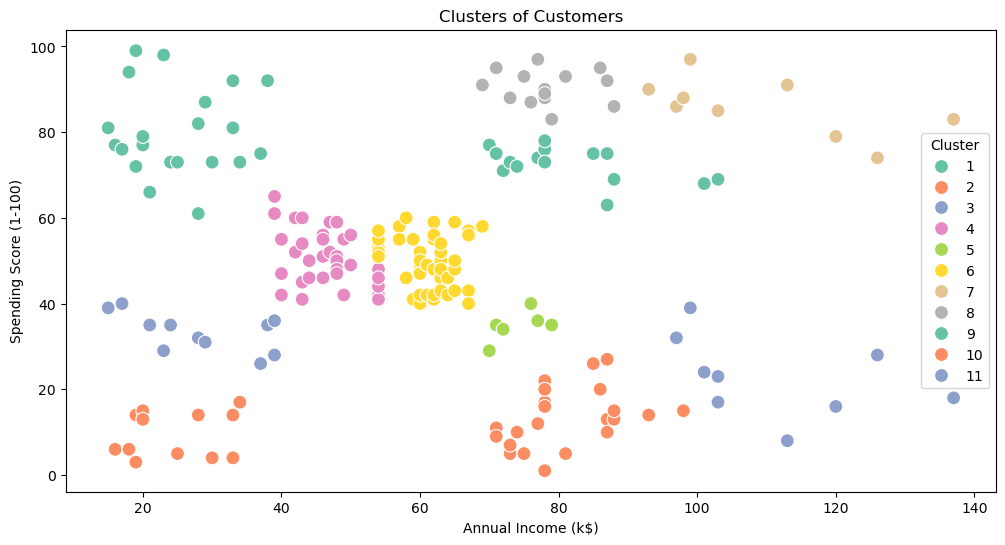

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

# Example dataset (use your own data here)
# df = pd.read_csv('your_data.csv')

# Calculate the linkage matrix
linkage_matrix = linkage(df[['Annual Income (k$)', 'Spending Score (1-100)']], method='ward')

# Define the maximum distance for clustering (set this based on your dendrogram analysis)
max_distance = 60  # Adjust this threshold based on your analysis of the dendrogram

# Use the fcluster function to create clusters
clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Analyze the clusters: calculate mean values for the numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns
cluster_analysis = df.groupby('Cluster')[numeric_columns].mean()

# Print the cluster analysis
print("Cluster Analysis:")
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


Cluster Analysis for Annual Income (k$), Spending Score (1-100):
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
1         22.000000  25.333333           25.095238               80.047619   
2         23.000000  45.217391           26.304348               20.913043   
3         63.055556  46.111111           46.388889               50.638889   
4        106.142857  39.816327           62.734694               48.020408   
5        190.000000  33.000000          109.555556               85.888889   
6        153.600000  32.600000           79.633333               81.000000   
7        156.652174  41.217391           80.956522               12.782609   
8        190.777778  40.444444          111.000000               22.777778   

         Cluster  
Cluster           
1            1.0  
2            2.0  
3            3.0  
4            4.0  
5            5.0  
6            6.0  
7 

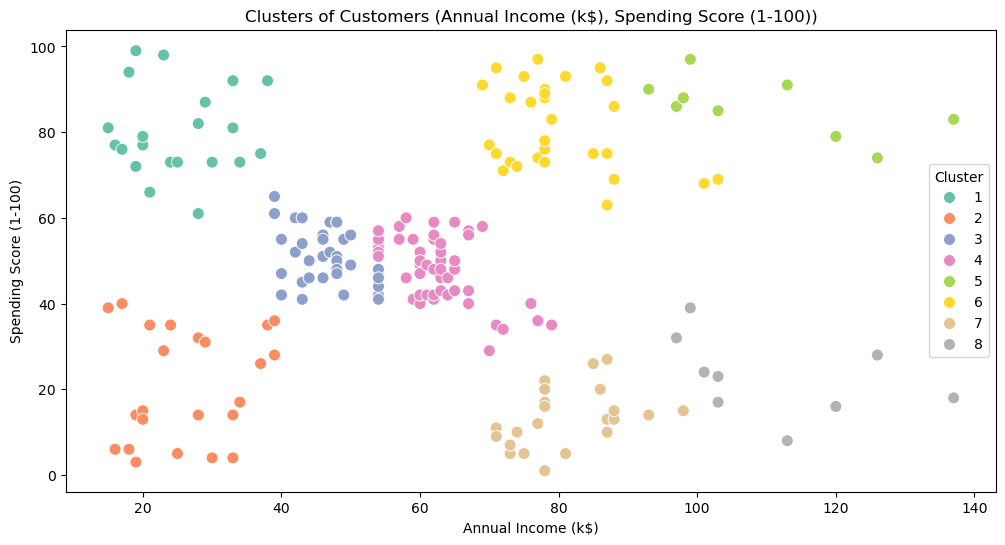

Cluster Analysis for Annual Income (k$), Age:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
1         30.325581  27.511628           29.697674               59.790698   
2         81.136364  63.363636           53.409091               51.136364   
3         34.500000  53.166667           32.555556               26.444444   
4        196.500000  36.500000          124.000000               49.625000   
5        179.250000  35.458333           93.750000               56.583333   
6        129.325581  26.906977           70.255814               54.953488   
7        117.976190  46.095238           66.928571               41.666667   

         Cluster  
Cluster           
1            1.0  
2            2.0  
3            3.0  
4            4.0  
5            5.0  
6            6.0  
7            7.0  


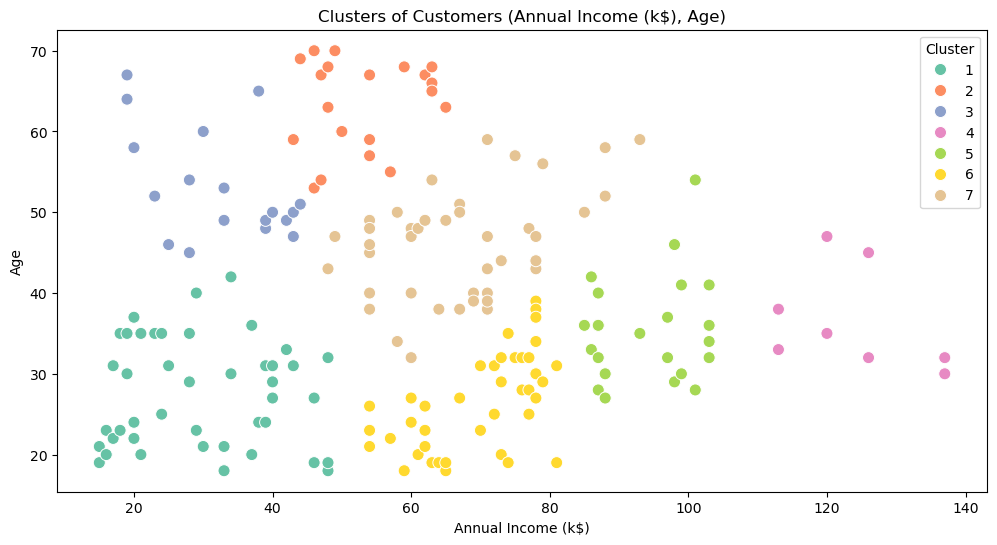

Cluster Analysis for Spending Score (1-100), Age:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
1        115.157895  30.175439           66.070175               82.350877   
2        117.150000  42.650000           67.125000               12.275000   
3         83.698113  53.169811           54.207547               50.452830   
4         80.576923  22.653846           52.423077               51.692308   
5         96.625000  39.041667           59.375000               34.875000   

         Cluster  
Cluster           
1            1.0  
2            2.0  
3            3.0  
4            4.0  
5            5.0  


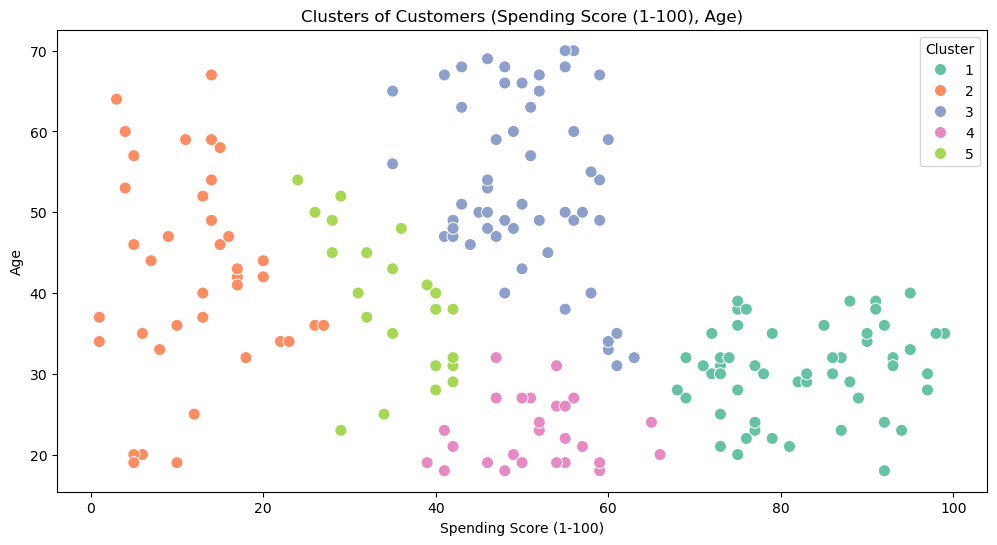

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

# Example dataset (use your own data here)
# df = pd.read_csv('your_data.csv')

# Function to perform clustering and plotting
def perform_clustering_and_plot(df, columns, max_distance=100):
    # Calculate the linkage matrix using the 'ward' method
    linkage_matrix = linkage(df[columns], method='ward')

    # Use fcluster to assign customers to clusters based on the max distance
    clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')

    # Add the cluster labels to the DataFrame
    df['Cluster'] = clusters

    # Analyze the clusters by calculating the mean values for each numeric column
    numeric_columns = df.select_dtypes(include=['number']).columns
    cluster_analysis = df.groupby('Cluster')[numeric_columns].mean()

    # Print the cluster analysis result
    print(f"Cluster Analysis for {', '.join(columns)}:")
    print(cluster_analysis)

    # Visualize the clusters in a scatter plot
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x=columns[0], y=columns[1], hue='Cluster', palette='Set2', s=75)
    plt.title(f'Clusters of Customers ({", ".join(columns)})')
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.legend(title='Cluster')
    plt.show()

# Perform clustering and plotting for different combinations of features

# Combination 1: Annual Income vs Spending Score
perform_clustering_and_plot(df, ['Annual Income (k$)', 'Spending Score (1-100)'])

# Combination 2: Annual Income vs Age
perform_clustering_and_plot(df, ['Annual Income (k$)', 'Age'])

# Combination 3: Spending Score vs Age
perform_clustering_and_plot(df, ['Spending Score (1-100)', 'Age'])


## Task 4: k-means-Clustering

In a next step, you want to perform a clustering with the k-means algorithm and compare the results with the hierarchical clustering.

a) Import the *k-means* algorithm from *scikit-learn* and run the algorithm with different numbers of clusters. Plot the inertias of the different runs and use the elbow method to determine the optimal number of clusters.

C:\Users\bbayr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bbayr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bbayr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bbayr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

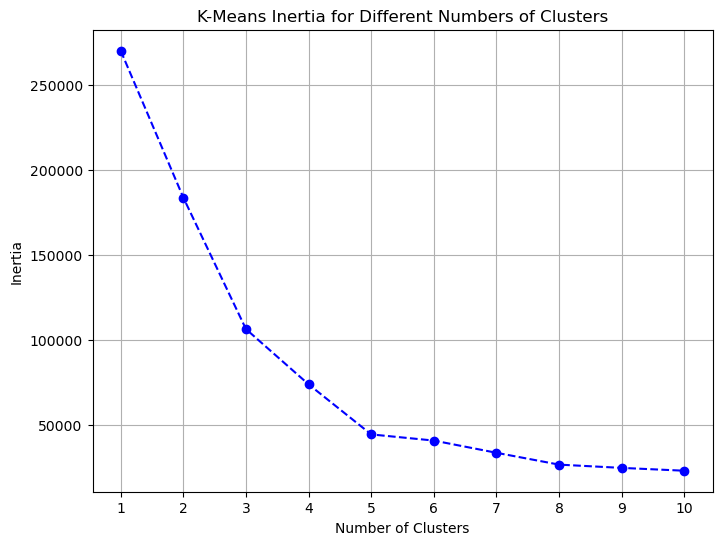

Inertia for each number of clusters:
Clusters: 1, Inertia: 269981.28
Clusters: 2, Inertia: 183653.32894736846
Clusters: 3, Inertia: 106348.3730621112
Clusters: 4, Inertia: 73880.64496247195
Clusters: 5, Inertia: 44448.45544793371
Clusters: 6, Inertia: 40825.16946386947
Clusters: 7, Inertia: 33642.57922077922
Clusters: 8, Inertia: 26686.83778518779
Clusters: 9, Inertia: 24766.47160979344
Clusters: 10, Inertia: 23103.122085983912


In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set the number of threads to 1 to avoid memory leaks
os.environ["OMP_NUM_THREADS"] = "1"

# Example dataset (use your own data here)
# df = pd.read_csv('your_data.csv')

# Define the columns to be used for clustering
columns = ['Annual Income (k$)', 'Spending Score (1-100)']

# Prepare the data
data = df[columns]

# Run K-Means with different numbers of clusters and calculate the inertia
inertias = []
range_clusters = range(1, 11)  # We will test cluster sizes from 1 to 10

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

# Plot the inertia for each number of clusters to apply the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertias, marker='o', linestyle='--', color='b')
plt.title('K-Means Inertia for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()

# Print the inertias for further inspection
print("Inertia for each number of clusters:")
for n_clusters, inertia in zip(range_clusters, inertias):
    print(f"Clusters: {n_clusters}, Inertia: {inertia}")


b) Analyze the results of the k-means algorithm for the chosen number of clusters and compare the results with those of hierarchical clustering.

C:\Users\bbayr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


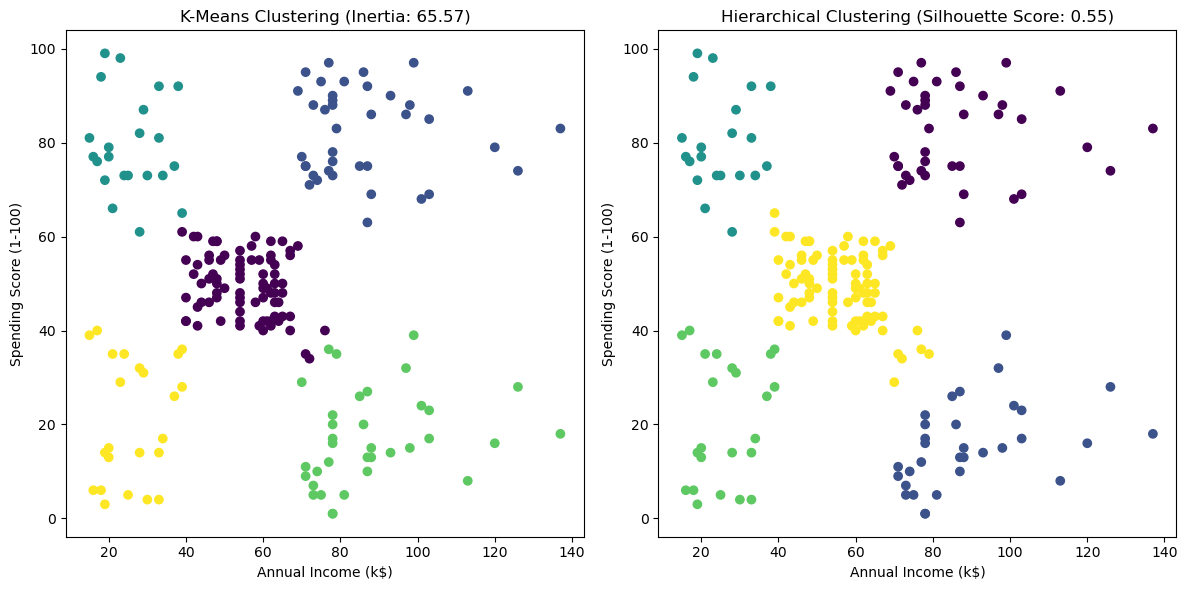

K-Means Inertia: 65.57
K-Means Silhouette Score: 0.55
Hierarchical Clustering Silhouette Score: 0.55


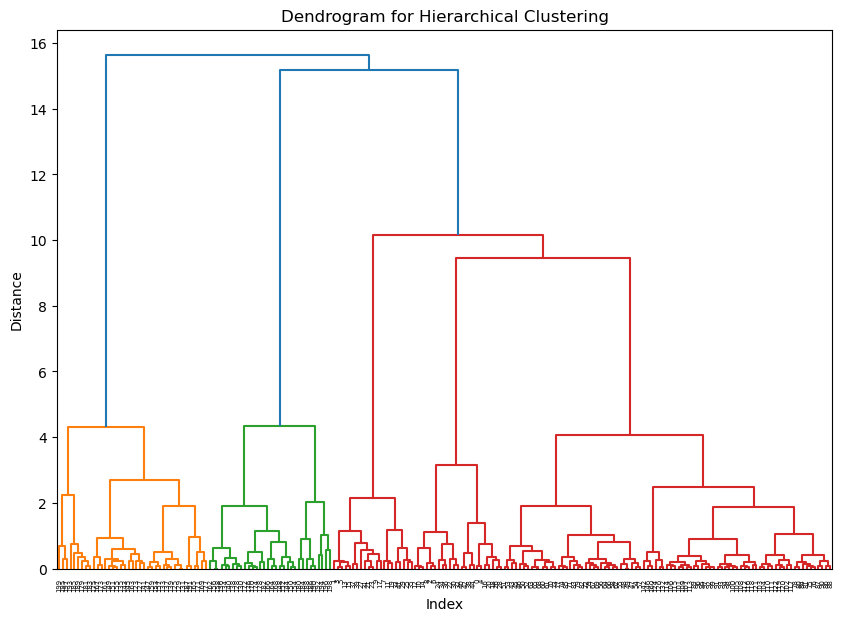

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

# Assuming you already have your DataFrame df loaded
columns = ['Annual Income (k$)', 'Spending Score (1-100)']

# Prepare the data
data = df[columns]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 1. Perform K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Chosen number of clusters = 5
kmeans.fit(data_scaled)
kmeans_labels = kmeans.labels_
kmeans_inertia = kmeans.inertia_

# 2. Perform Hierarchical Clustering (Agglomerative Clustering)
Z = linkage(data_scaled, method='ward')
hierarchical_labels = fcluster(Z, t=5, criterion='maxclust')  # Cutting the dendrogram at 5 clusters

# 3. Evaluate with Silhouette Score
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_labels)

# 4. Visualize the Clusters
plt.figure(figsize=(12, 6))

# K-Means clustering visualization
plt.subplot(1, 2, 1)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeans_labels, cmap='viridis')
plt.title(f'K-Means Clustering (Inertia: {kmeans_inertia:.2f})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Hierarchical clustering visualization
plt.subplot(1, 2, 2)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=hierarchical_labels, cmap='viridis')
plt.title(f'Hierarchical Clustering (Silhouette Score: {hierarchical_silhouette:.2f})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

# Print the evaluation results
print(f"K-Means Inertia: {kmeans_inertia:.2f}")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}")

# Dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()
